# EDA ON Haberman dataset

*   Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)


# Data Description 
The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.



Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

    Age of patient at time of operation (numerical)
    Patient's year of operation (year - 1900, numerical)
    Number of positive axillary nodes detected (numerical)
    Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year



# objective:
    To predict whether the patient will survive after 5 years of treatment based of patients age, year of treatment and positive auxilliary nodes.

In [1]:
#importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('haberman.csv')

In [2]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
#re-writing the proper column names
col_names = ['age','year_of_treatment','positive_aux_nodes','survival_status_5y']
df.columns = col_names
df.head()

,age,year_of_treatment,positive_aux_nodes,survival_status_5y
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.shape

(306, 4)

In [5]:
df.columns

Index(['age', 'year_of_treatment', 'positive_aux_nodes', 'survival_status_5y'], dtype='object')

In [6]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                   306 non-null int64
year_of_treatment     306 non-null int64
positive_aux_nodes    306 non-null int64
survival_status_5y    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [7]:
df['survival_status_5y'].unique()

array([1, 2])

# observations:
    1.No missing values in the dataset.
    2.The target-column i.e survival_status_5y has values 1 and 2 means if 1 then person is alive and if 2 then 
    
    person is dead.
      1 and 2 donsn't sound meaningful so let's change it to alive and dead.
     3.The column survival_status_5y is of type int64 but it should be of type category.

In [8]:
df['survival_status_5y'] = df['survival_status_5y'].map({1:"alive",2:"dead"})
df['survival_status_5y'] = df['survival_status_5y'].astype('category')
df.head()

,age,year_of_treatment,positive_aux_nodes,survival_status_5y
0,30,64,1,alive
1,30,62,3,alive
2,30,65,0,alive
3,31,59,2,alive
4,31,65,4,alive


high level statistics

In [9]:
df.describe()

,age,year_of_treatment,positive_aux_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# observations:
1.we have 3 features: age, year_of_treatment,positive_aux_nodes.

2.The mean age of patients is 52.45 with the standard deviation of 10.803.The age vary from 30 to 83.

3.Max positive auxuliarry node is 52 but 75% of people have less than 4 positive auxiliarry nodes and nearly 25% people  have no positive auxilliary nodes.

In [10]:
df['survival_status_5y'].value_counts(normalize=True)

alive    0.735294
dead     0.264706
Name: survival_status_5y, dtype: float64

The target column has almost 73% values as alive.

# 2D scatter plot

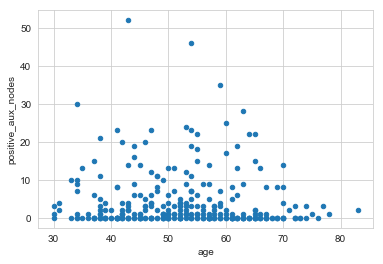

In [26]:
#sactter plot for positive_aux_nodes and age
df.plot(kind='scatter',x='age',y='positive_aux_nodes')
plt.show()

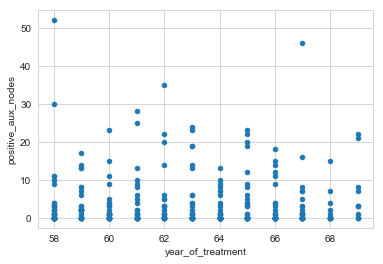

In [27]:
#sactter plot for positive_aux_nodes and year_of_treatment
df.plot(kind='scatter',x='year_of_treatment',y='positive_aux_nodes')
plt.show()

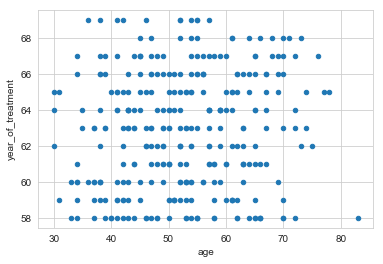

In [28]:
#sactter plot for year_of_treatment and age
df.plot(kind='scatter',x='age',y='year_of_treatment')
plt.show()

# OBSERVATION:
From the scatter plots,we can see that scatter plot of positive_aux_nodes and year of treatment has more separation than other classes.

# pair-plots
used to visualize the pattern between small features and in 2D.

We can not visualize higher dimensions like 3D or 4D in pair plots.

The diagonal elements are PDF of each features.

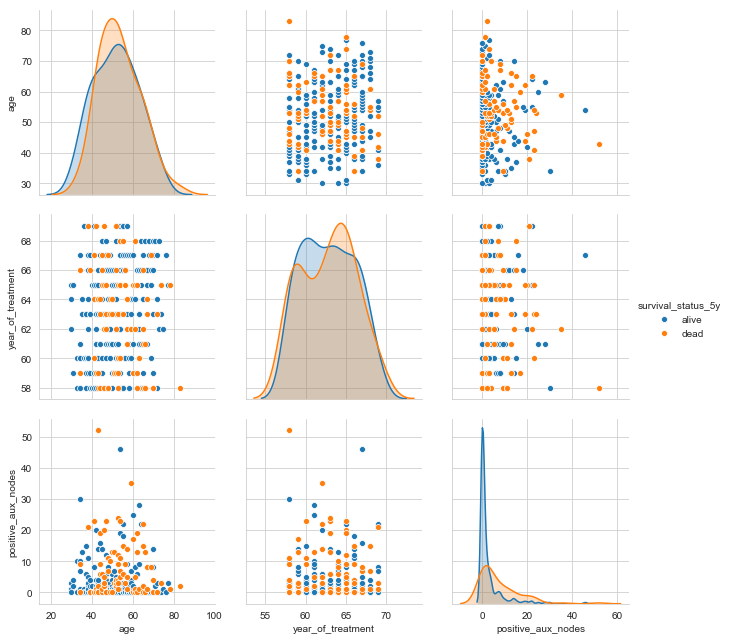

In [14]:
sns.set_style("whitegrid");
sns.pairplot(df,hue='survival_status_5y',height =3);
plt.show()

# OBSERVATION:
The scatter plot of positive_aux_nodes and year_of_treatment has more separation than other classes.
The year_of_treatment and age  also has separation but positive_aux_nodes and year_of_treatment is more distinguishable.

# PDF(probability density function)
PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value.

PDF is smoothed form of histograms.

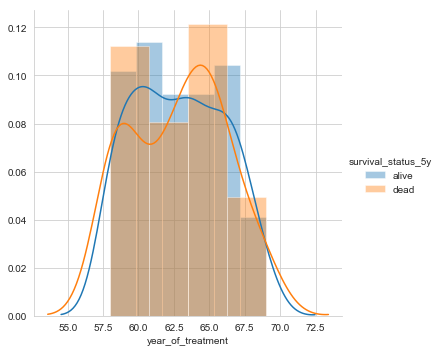

In [15]:
sns.FacetGrid(df,hue='survival_status_5y',height=5).map(sns.distplot,"year_of_treatment").add_legend();
plt.show()

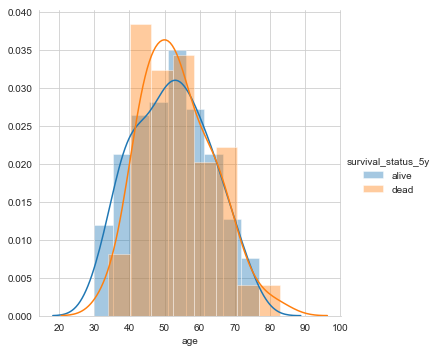

In [16]:
sns.FacetGrid(df,hue="survival_status_5y",height=5).map(sns.distplot,"age").add_legend()
plt.show()

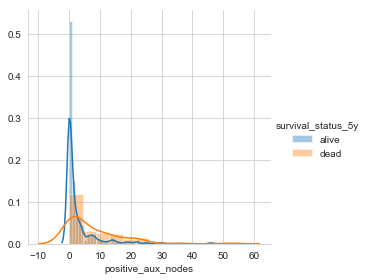

In [17]:
sns.FacetGrid(df,hue='survival_status_5y',height=4).map(sns.distplot,"positive_aux_nodes").add_legend()
plt.show()

# OBSERVATIONS:
1.In all the plots,the features are overlapping eachother massively.

2.From the last plot we can say that almost 50% people who had 0-5 or 0-4 positive auxiliary nodes is alive or survived.

# CDF(Cummulative Distribution Function)
CDF gives you cummulative probability associated with a PDF.

The height of a CDF tells that the probability that a R.V X is less than equal to some value x.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]


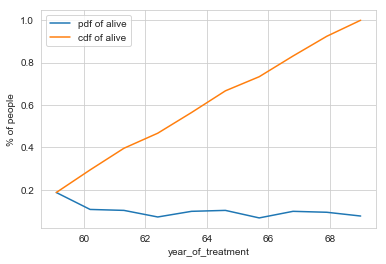

In [18]:
alive = df.loc[df["survival_status_5y"] == "alive"]
dead = df.loc[df["survival_status_5y"]== 'dead']
labels= ['pdf of alive','cdf of alive']
count,bin_edge = np.histogram(alive['year_of_treatment'],bins=10,density =True)
pdf =count/sum(count)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edge[1:], pdf)
plt.plot(bin_edge[1:], cdf)
plt.xlabel("year_of_treatment")
plt.ylabel("% of people")


plt.legend(labels)
plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


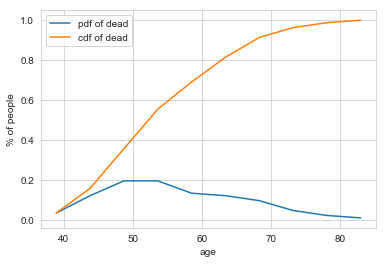

In [19]:

labels= ['pdf of dead','cdf of dead']
count,bin_edge = np.histogram(dead['age'],bins=10,density =True)
pdf =count/sum(count)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:], pdf)
plt.plot(bin_edge[1:], cdf)
plt.xlabel("age")
plt.ylabel("% of people")


plt.legend(labels)
plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


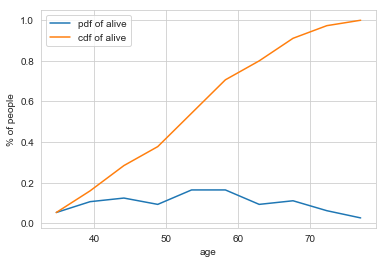

In [20]:

labels= ['pdf of alive','cdf of alive']
count,bin_edge = np.histogram(alive['age'],bins=10,density =True)
pdf =count/sum(count)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:], pdf)
plt.plot(bin_edge[1:], cdf)
plt.xlabel("age")
plt.ylabel("% of people")


plt.legend(labels)
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


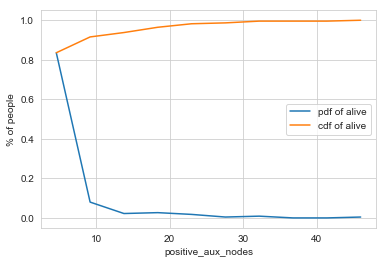

In [21]:

labels= ['pdf of alive','cdf of alive']
count,bin_edge = np.histogram(alive['positive_aux_nodes'],bins=10,density =True)
pdf =count/sum(count)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:], pdf)
plt.plot(bin_edge[1:], cdf)
plt.xlabel("positive_aux_nodes")
plt.ylabel("% of people")

plt.legend(labels)
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


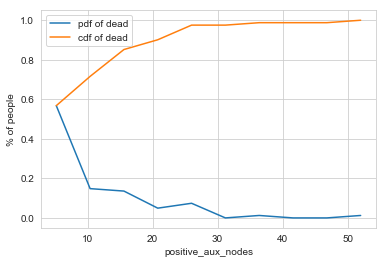

In [22]:

labels= ['pdf of dead','cdf of dead']
count,bin_edge = np.histogram(dead['positive_aux_nodes'],bins=10,density =True)
pdf =count/sum(count)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:], pdf)
plt.plot(bin_edge[1:], cdf)
plt.xlabel("positive_aux_nodes")
plt.ylabel("% of people")

plt.legend(labels)
plt.show()

# OBSERVATIONS:
1.There are less than 25% of people below age 48 who is dead.

2.people with more than 38 positive auxiliary nodes are not alive.

3. only 16% of people having their treatment before 1960 is alive.
4. almost 78% of people having age 58 is alive.

5.In case of positive auxiliary nodes,percentage of people alive and dead are different.so,the positive_aux_nodes column is most important column


# BOX PLOT
Another method of visualizing the patterns more intuitively.

Gives a five number summary of data based on minimum,first quartile,median,third quartile and maximum.

[]

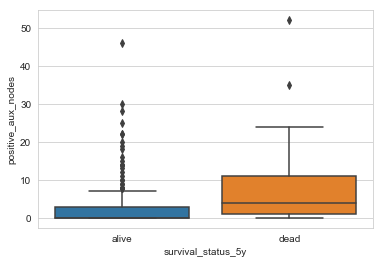

In [23]:
sns.boxplot(x="survival_status_5y",y="positive_aux_nodes",data =df)
plt.plot()

# OBSERVATIONS:
    
1. the positive auxiliary nodes for alive group for the 75th percentile value is approx 2 and the 25th and 50th percentiles are overlappled.

2. the positive auxiliary nodes for dead group for the 25th percentile is 1 and for 50th percentile is 3 and for 75th percentile it is 11.

3.whiskers for dead group is more farther away than alive group

# Violin Plot
similar to box-plot with an addition of kernel density plot on both side of box plot.

[]

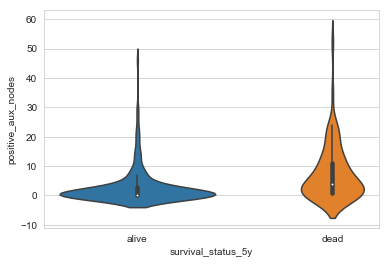

In [24]:
sns.violinplot(x="survival_status_5y",y="positive_aux_nodes",data=df,height=8)
plt.plot()


# CONTOUR plot 
used to understand the density of bi-variate data.

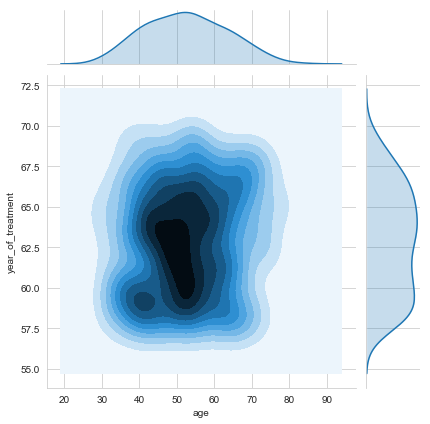

In [32]:
sns.jointplot(x="age", y="year_of_treatment", data=df, kind="kde");
plt.show();

# people with age between 45 and 55 are treated more in the year 1958-1965.